# Agglomerative Clustering


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    aggl = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    cluster_labels = aggl.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

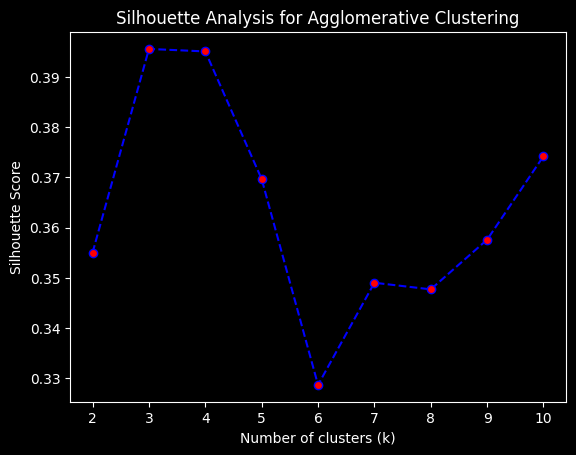

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Agglomerative Clustering")
plt.show()

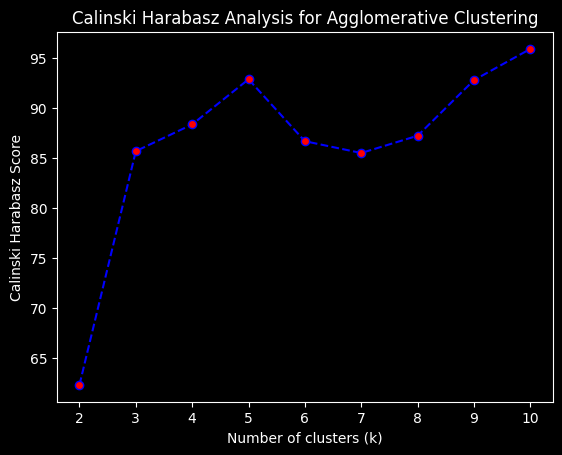

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for Agglomerative Clustering")
plt.show()

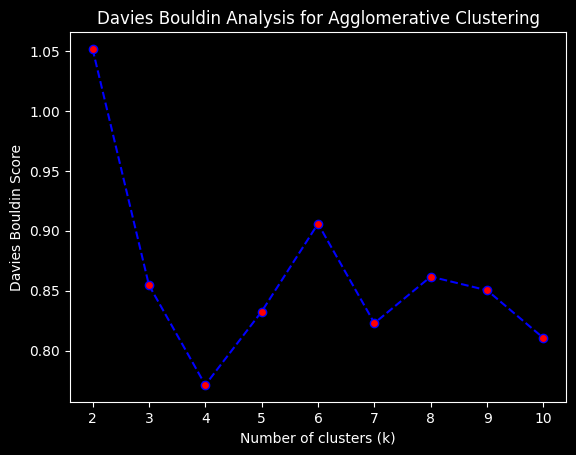

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for Agglomerative Clustering")
plt.show()

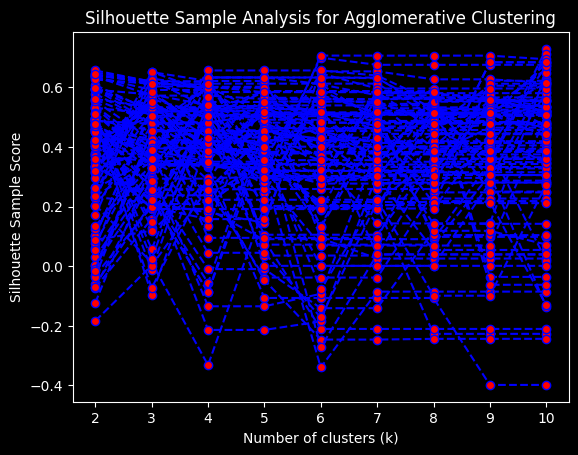

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for Agglomerative Clustering")
plt.show()

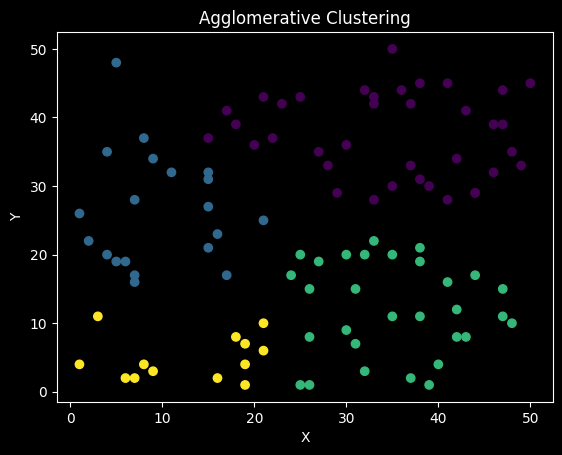

In [8]:
aggl = AgglomerativeClustering(n_clusters=4, compute_distances=True, linkage="ward")
cluster_labels = aggl.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative Clustering")
plt.show()

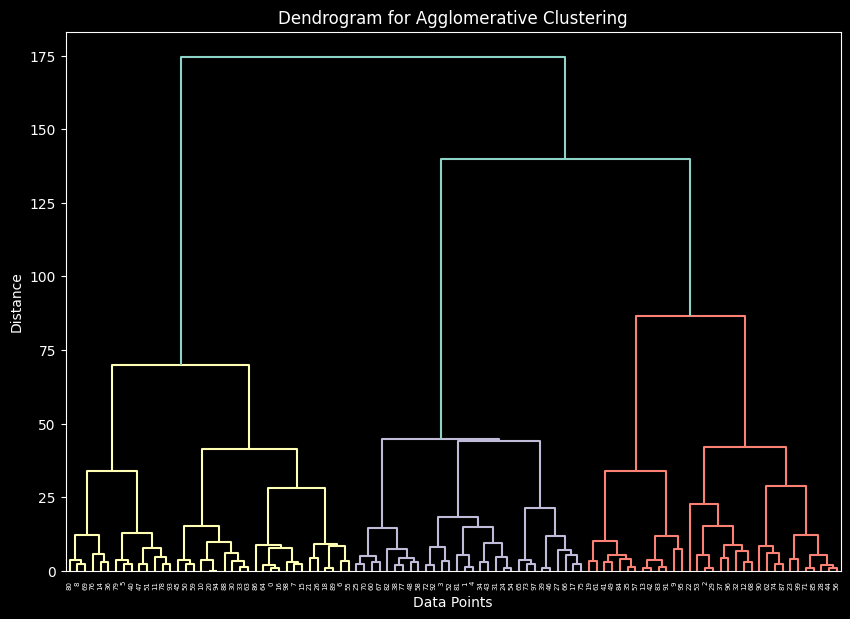

In [ ]:
linked = linkage(df, "ward")
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    labels=range(len(df)),
    distance_sort=False,
    show_leaf_counts=True,
)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [10]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : 0.39506708942508256
Calinski Harabasz Score : 88.38391327970866
Davies Bouldin Score : 0.7713160608098626
Silhouette Samples : [ 0.59371176  0.51963582  0.46152833  0.53366303  0.53018991  0.37857887
  0.48271156  0.62055974  0.37393905  0.45350982  0.20869449 -0.33190508
  0.57884224  0.63349012  0.19223041  0.61901217  0.59759985  0.39318714
  0.52034454  0.52885121  0.25736129  0.59153209  0.26061957  0.50320393
  0.60210732  0.18032494  0.57249886  0.33242906  0.38358482  0.48841624
  0.4767023   0.60342932  0.60111777  0.39510862  0.58448411  0.52170123
  0.33733197  0.49989005  0.39805058 -0.21382879  0.28914698  0.55115926
  0.61267254  0.62169802  0.34322291  0.36847472 -0.13451434  0.13558244
  0.41836327  0.42102773  0.35357617 -0.05613921  0.45447152  0.54643966
  0.59864061  0.52678143  0.34054747  0.53736955  0.29391072  0.42304655
  0.15802369  0.63359871 -0.00964255  0.34122884  0.56971845  0.53198946
  0.04502005  0.25821368  0.56548222  0.37393753  0

In [11]:
dump(aggl, "../../../Models/agglomerativeClustering.joblib")

['../../../Models/agglomerativeClustering.joblib']